In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
test_y = np.load("test_y.npy")
test_pred = np.load("test_out.npy")


upper = 1.01
lower = 0.1

size_x = [3, 4, 5, 7, 10]
size_y = [3, 4, 5, 7, 10]
sample_size = 10000
test_samples = np.random.randint(0, test_y.shape[0], sample_size)



for decile in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    lower = decile
    upper = decile + 0.1
    errors = np.empty((sample_size, 5))
    errors[:] = np.nan
    idx = 0
    for x, y in zip(size_x, size_y):
        for i, sample in enumerate(test_samples):
            start_x = np.random.randint(0, 14 - x)
            start_y = np.random.randint(0, 14 - y)

            pred = np.copy(test_pred[sample, start_x:start_x + x, start_y : start_y + y])
            pred[pred >= 0.5] = 1.
            pred[pred < 0.5] = 0.
            #print(pred)
            true = np.copy(test_y[sample, start_x:start_x + x, start_y : start_y + y])
            true_mean = np.mean(true)
            if true_mean >= lower and true_mean < upper:
                pred_mean = np.mean(pred)
                plot_error = true_mean - pred_mean
                errors[i, idx] = plot_error
        idx += 1
    boots = np.zeros((5000))
    for sample in range(boots.shape[0]):
        samp_i = np.random.choice(errors[:, -1], size=boots.shape[0], replace=True, p=None)
        boots[sample] = np.nanmean(samp_i)
        
    print(decile, "Lower", np.nanpercentile(boots, 2.5, axis = 0))
    print(decile, "Upper", np.nanpercentile(boots, 97.5, axis = 0))
    
    

0 Lower 0.0036117109092247677
0 Upper 0.005395336076155481
0.1 Lower 0.020000000216981985
0.1 Upper 0.0360942212081931
0.2 Lower 0.002040621463678168
0.2 Upper 0.03260134440440133
0.3 Lower -0.022934022270706025
0.3 Upper 0.012986244995604686
0.4 Lower -0.05936043856420218
0.4 Upper -0.004999997999332849
0.5 Lower -0.1017149021540863
0.5 Upper -0.03278989573703335
0.6 Lower -0.12099074026721494
0.6 Upper -0.052103478209819275
0.7 Lower -0.05854553011192604
0.7 Upper -0.004373832089048073
0.8 Lower -0.07338139509594672
0.8 Upper -0.028766697080168015
0.9 Lower -0.015354758630912511
0.9 Upper 0.0261308660338537


In [6]:
np.nanpercentile(errors, 97.5, axis = 0)

array([0.33333333, 0.3125    , 0.24000001, 0.20408163, 0.17      ])

In [4]:
np.nanmean(errors, axis = 0)

array([ 1.52038287e-02,  5.12160768e-03, -8.41509840e-05, -3.54394040e-03,
       -3.88021749e-03])

In [136]:
np.nanpercentile(errors, 90, axis = 0)

array([0.33333335, 0.3125    , 0.28      , 0.2244898 , 0.19      ])

In [16]:
test_y = np.load("test_y.npy")
test_pred = np.load("test_out.npy")

l = [2, 2, 3, 3, 4, 4, 5, 5,]
r = [2, 3, 3, 4, 4, 5, 5, 6,]

size_x = [3, 4, 5, 10]
size_y = [3, 4, 5, 10]
sample_size = 100


upper = 1.1
lower = 0.8

print(f"Error for tree cover between {lower * 100} and {upper * 100}%")


for size_l, size_r in zip(l ,r):

    labeled_cc = np.mean(test_y[:, size_l:-size_r], axis = (1, 2))
    pred_cc = np.nanmean(test_pred[:, size_l:-size_r], axis = (1, 2))
    
    
    
    pred_cc[labeled_cc >= upper] = np.nan
    pred_cc[labeled_cc < lower] = np.nan
    labeled_cc[labeled_cc >= upper] = np.nan
    labeled_cc[labeled_cc <  lower] = np.nan

    
    labeled_cc = labeled_cc[~np.isnan(labeled_cc)]
    pred_cc = pred_cc[~np.isnan(pred_cc)]
    diff = abs(labeled_cc - pred_cc)
    tc_error = np.nanmean(diff).astype(np.float32)
    
    tc_5 = np.around(np.percentile(diff, 2.5), 3).astype(np.float32)
    tc_95 = np.around(np.percentile(diff, 95), 3).astype(np.float32)
    print(f"{((14 - size_l - size_r)**2)/100} ha plots: "
          f"tree cover error (avg, 95th percentile): {np.around(100*np.around(tc_error, 4), 3)}%, {np.around(100*tc_95, 4)}%")

Error for tree cover between 80.0 and 110.00000000000001%
1.0 ha plots: tree cover error (avg, 95th percentile): 3.56%, 10.4%
0.81 ha plots: tree cover error (avg, 95th percentile): 3.57%, 9.7%
0.64 ha plots: tree cover error (avg, 95th percentile): 3.47%, 10.0%
0.49 ha plots: tree cover error (avg, 95th percentile): 3.55%, 9.4%
0.36 ha plots: tree cover error (avg, 95th percentile): 3.55%, 9.8%
0.25 ha plots: tree cover error (avg, 95th percentile): 3.67%, 10.9%
0.16 ha plots: tree cover error (avg, 95th percentile): 3.46%, 9.7%
0.09 ha plots: tree cover error (avg, 95th percentile): 3.51%, 9.6%


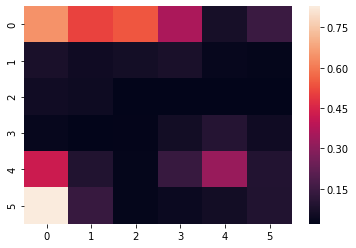

In [158]:
sns.heatmap(test_pred[666, 4:-4, 4:-4])

In [160]:
np.mean(test_pred[666, 4:-4, 4:-4])

0.1496079307463434

Text(0.5, 1, 'Tree cover = 7/25 = 28%')

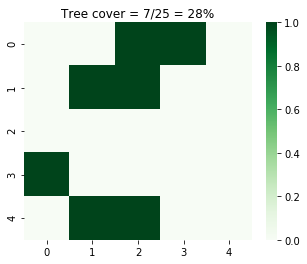

In [321]:
plt.figure(figsize=(5.1,4)) #758
sns.heatmap(test_y[815, 4:-5, 4:-5], cmap = "Greens").set_title('Tree cover = 7/25 = 28%')

In [318]:
np.mean(test_pred[815, 4:-5, 4:-5])

0.3184706926345825

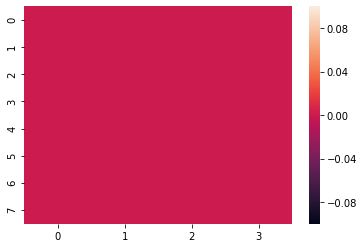

In [65]:
avg_error = np.zeros((8, 4))
sns.heatmap(avg_error)

In [126]:
test_y = np.load("test_y.npy")
test_pred = np.load("test_preds.npy")

l = [2, 2, 3, 3, 4, 4, 5, 5,]
r = [2, 3, 3, 4, 4, 5, 5, 6,]
test_pred[test_pred >= 0.7] = 1.
test_pred[test_pred < 0.7] = 0.

for size_l, size_r in zip(l ,r):
    labeled_cc = np.mean(test_y[:, size_l:-size_r], axis = (1, 2))
    
    pred_cc = np.nanmean(test_pred[:, size_l:-size_r], axis = (1, 2))
    pred_cc[labeled_cc >= 1.1] = np.nan
    pred_cc[labeled_cc < 0.8] = np.nan
    labeled_cc[labeled_cc >= 1.1] = np.nan
    labeled_cc[labeled_cc < 0.8] = np.nan

    
    labeled_cc = labeled_cc[~np.isnan(labeled_cc)]
    pred_cc = pred_cc[~np.isnan(pred_cc)]
    diff = abs(labeled_cc - pred_cc)
    tc_error = np.nanmean(diff).astype(np.float32)
    
    tc_5 = np.around(np.percentile(diff, 2.5), 3).astype(np.float32)
    tc_95 = np.around(np.percentile(diff, 95), 3).astype(np.float32)
    print(f"{((14 - size_l - size_r)**2)/100} ha plots: "
          f"tree cover error (avg, 99th percentile): {np.around(100*np.around(tc_error, 4), 3)}, {np.around(100*tc_95, 4)}%")

1.0 ha plots: tree cover error (avg, 99th percentile): 3.7, 14.1%
0.81 ha plots: tree cover error (avg, 99th percentile): 3.7, 16.4%
0.64 ha plots: tree cover error (avg, 99th percentile): 3.6, 13.2%
0.49 ha plots: tree cover error (avg, 99th percentile): 3.88, 16.0%
0.36 ha plots: tree cover error (avg, 99th percentile): 3.9, 14.0%
0.25 ha plots: tree cover error (avg, 99th percentile): 3.79, 16.6%
0.16 ha plots: tree cover error (avg, 99th percentile): 3.69, 12.5%
0.09 ha plots: tree cover error (avg, 99th percentile): 3.77, 16.0%


In [4]:
test_y = np.load("test_y.npy")
test_pred = np.load("test_out.npy")

l = [2, 2, 3, 3, 4, 4, 5, 5,]
r = [2, 3, 3, 4, 4, 5, 5, 6,]
test_pred[test_pred >= 0.7] = 1.
test_pred[test_pred < 0.7] = 0.

for size_l, size_r in zip(l ,r):
    labeled_cc = np.mean(test_y[:, size_l:-size_r], axis = (1, 2))
    
    pred_cc = np.nanmean(test_pred[:, size_l:-size_r], axis = (1, 2))
    pred_cc[labeled_cc >= 1.1] = np.nan
    pred_cc[labeled_cc < 0.8] = np.nan
    labeled_cc[labeled_cc >= 1.1] = np.nan
    labeled_cc[labeled_cc < 0.8] = np.nan

    
    labeled_cc = labeled_cc[~np.isnan(labeled_cc)]
    pred_cc = pred_cc[~np.isnan(pred_cc)]
    diff = abs(labeled_cc - pred_cc)
    tc_error = np.nanmean(diff).astype(np.float32)
    
    tc_5 = np.around(np.percentile(diff, 2.5), 3).astype(np.float32)
    tc_95 = np.around(np.percentile(diff, 95), 3).astype(np.float32)
    print(f"{((14 - size_l - size_r)**2)/100} ha plots: "
          f"tree cover error (avg, 99th percentile): {np.around(100*np.around(tc_error, 4), 3)}, {np.around(100*tc_95, 4)}%")

1.0 ha plots: tree cover error (avg, 99th percentile): 2.42, 12.7%
0.81 ha plots: tree cover error (avg, 99th percentile): 2.43, 11.0%
0.64 ha plots: tree cover error (avg, 99th percentile): 2.3, 11.6%
0.49 ha plots: tree cover error (avg, 99th percentile): 2.31, 11.2%
0.36 ha plots: tree cover error (avg, 99th percentile): 2.26, 10.7%
0.25 ha plots: tree cover error (avg, 99th percentile): 2.4, 12.9%
0.16 ha plots: tree cover error (avg, 99th percentile): 2.08, 10.7%
0.09 ha plots: tree cover error (avg, 99th percentile): 2.26, 11.9%


In [42]:
belize = [90056, 16426, 10027, 7691, 6250, 5184, 4457, 3757, 4107, 7779]
costa_rica = [175987, 59032, 45015, 38107, 33342, 29974, 26542, 24372, 25738, 38633,]
el_salvador = [122162, 70380, 61678, 54790, 48388, 41995, 34703, 27483, 20858, 14263, ]
guatemala = [791755, 274102, 175783, 127673, 99089, 79690 ,65536, 56314, 57553, 119706, ]
honduras = [304851, 132810, 95165, 72996, 57619, 45939, 36438, 29195, 25819, 32573, ]
nicaragua = [302085, 127811, 103966, 89043, 78763, 71013, 64892, 60263, 61251, 60637, ]
panama = [329679, 189061, 148696, 124192, 105185, 87474, 72141, 60145, 55325, 64615, ]

def extrapolate_sampling(deciles, n):
    samples = np.empty(n)
    for i in range(samples.shape[0]):
        boot_sample = np.random.choice(np.arange(0, 100, 10), 56000, p = deciles / np.sum(deciles))
        samples[i] = np.sum(boot_sample >= 10) / n
    print(np.percentile(samples, 97.5) - np.percentile(samples, 2.5) / 2)
    
    


In [43]:
extrapolate_sampling(panama, 20000)



1.0421750000000003
